In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.3 MB/s eta 0:00:00


In [4]:
import seaborn as sns
import string
import re
import nltk
import spacy
import contractions
import math

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import unicodedata
from tqdm import trange
from nltk import tokenize
from nltk.corpus import words, names
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from textblob import TextBlob, Word, Blobber
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
plt.rcParams['figure.figsize'] = (17,10)
plt.rcParams['font.size'] = 20

#nlp = spacy.load('en_core_web_sm')

In [10]:
df1=pd.read_csv("True.csv")
df2=pd.read_csv("Fake.csv")

In [11]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
df1.shape

(21417, 4)

In [13]:
df1.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [15]:
df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
df1.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [17]:
df1.duplicated().sum()

206

In [18]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [19]:
df2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [20]:
df2.shape

(23481, 4)

In [21]:
df2.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [23]:
df2.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [24]:
df2.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [25]:
df2.duplicated().sum()

3

In [26]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

In [27]:
df1.shape

(21211, 4)

In [28]:
df2.shape

(23478, 4)

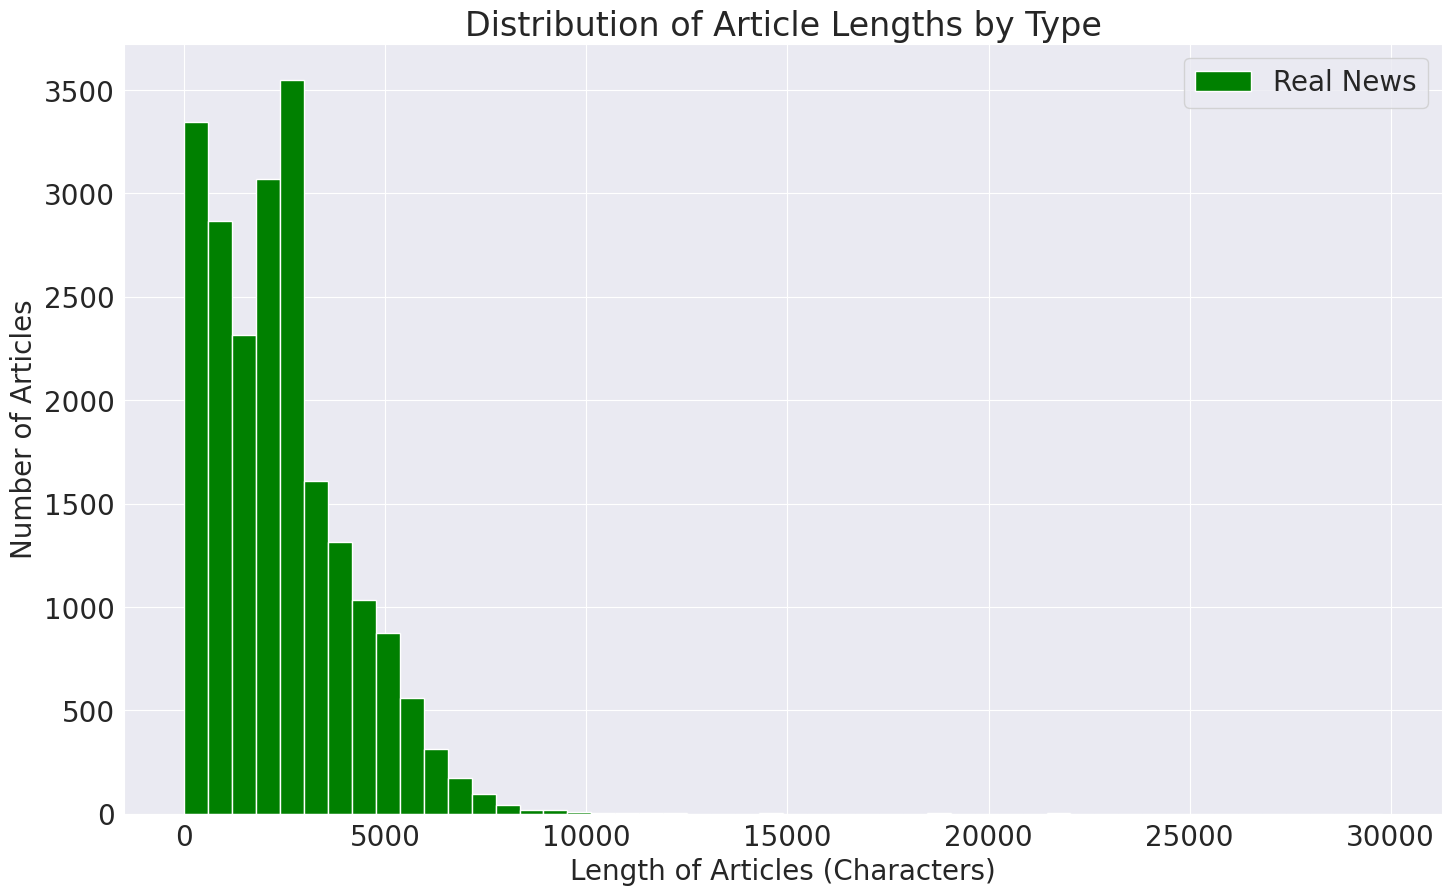

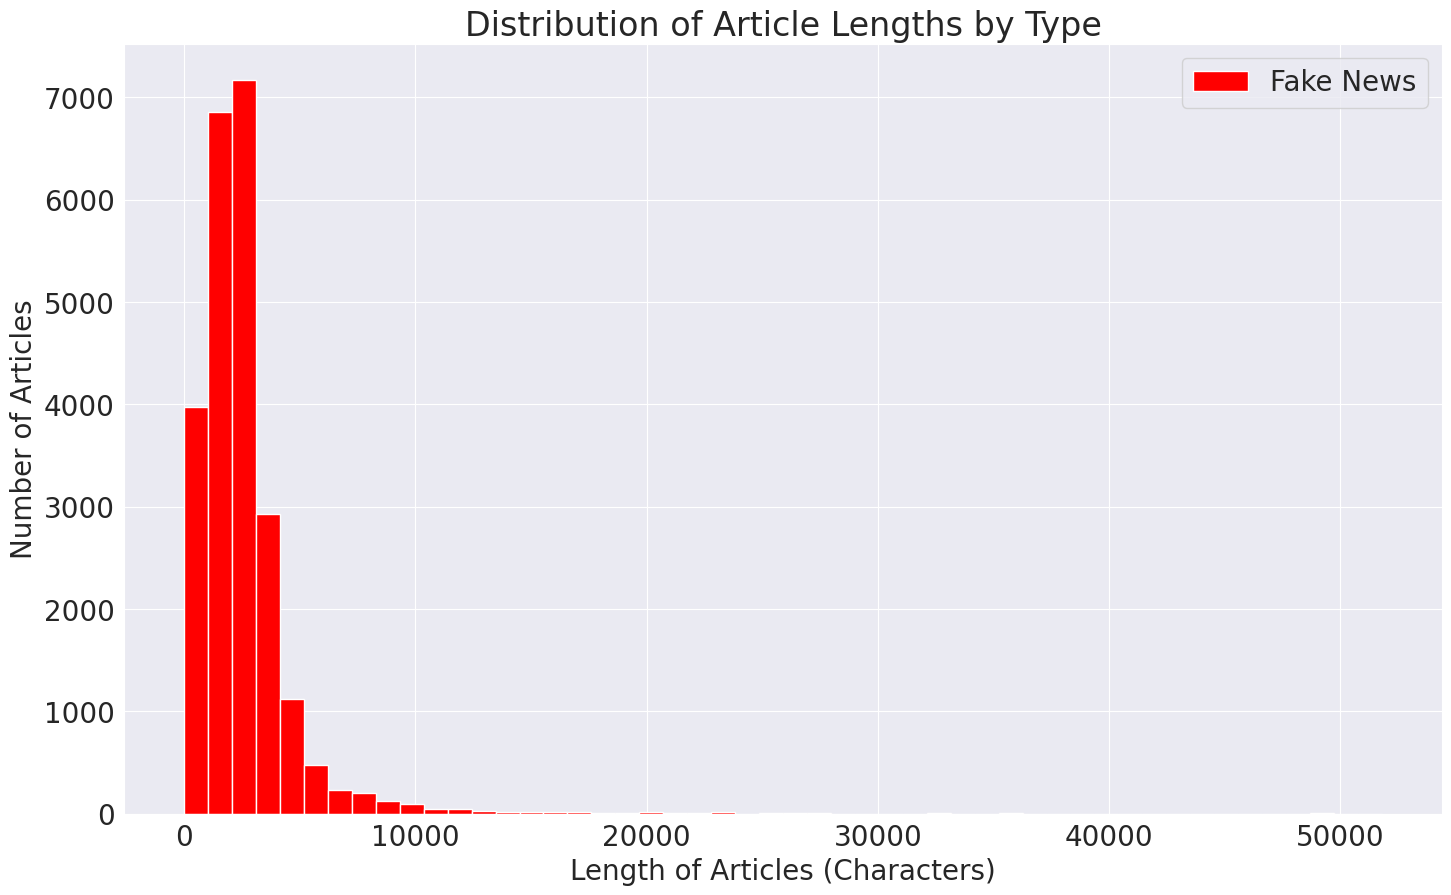

In [29]:
# Calculate lengths of articles
len_df1 = df1['text'].apply(len)
len_df2 = df2['text'].apply(len)

# Plot histograms with improved visual clarity
plt.hist(len_df1, bins=50, color='green', label='Real News')
plt.title('Distribution of Article Lengths by Type')
plt.xlabel('Length of Articles (Characters)')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(len_df2, bins=50, color='red', label='Fake News')
plt.title('Distribution of Article Lengths by Type')
plt.xlabel('Length of Articles (Characters)')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def common_occurring_words(texts, num_words=10):
    # Tokenize all texts at once
    all_words = nltk.word_tokenize(" ".join(texts).lower())

    # Use set for faster lookup
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Filter out non-alpha and stop words in one step
    words = [word for word in all_words if word.isalpha() and word not in stop_words]

    # Count word occurrences
    word_counts = Counter(words)

    return word_counts.most_common(num_words)

words_df1 = common_occurring_words(df1['text'])
words_df2 = common_occurring_words(df2['text'])

print('Real News:', words_df1)
print('Fake News:', words_df2)

Real News: [('said', 97839), ('trump', 53639), ('would', 31168), ('reuters', 28118), ('president', 26107), ('state', 19525), ('government', 18007), ('new', 16625), ('house', 16365), ('states', 16278)]
Fake News: [('trump', 74241), ('said', 31148), ('people', 26015), ('president', 25771), ('would', 23460), ('one', 22992), ('clinton', 18080), ('obama', 17920), ('like', 17659), ('donald', 17235)]


In [31]:
df1['label'] = 1
df2['label'] = 0

In [32]:
df1.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [33]:
df2.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [34]:
frames=[df1,df2]
df=pd.concat(frames,ignore_index=True)

In [35]:
df.shape

(44689, 5)

In [36]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [37]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [38]:
df.tail()

,title,text,subject,date,label
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44688,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


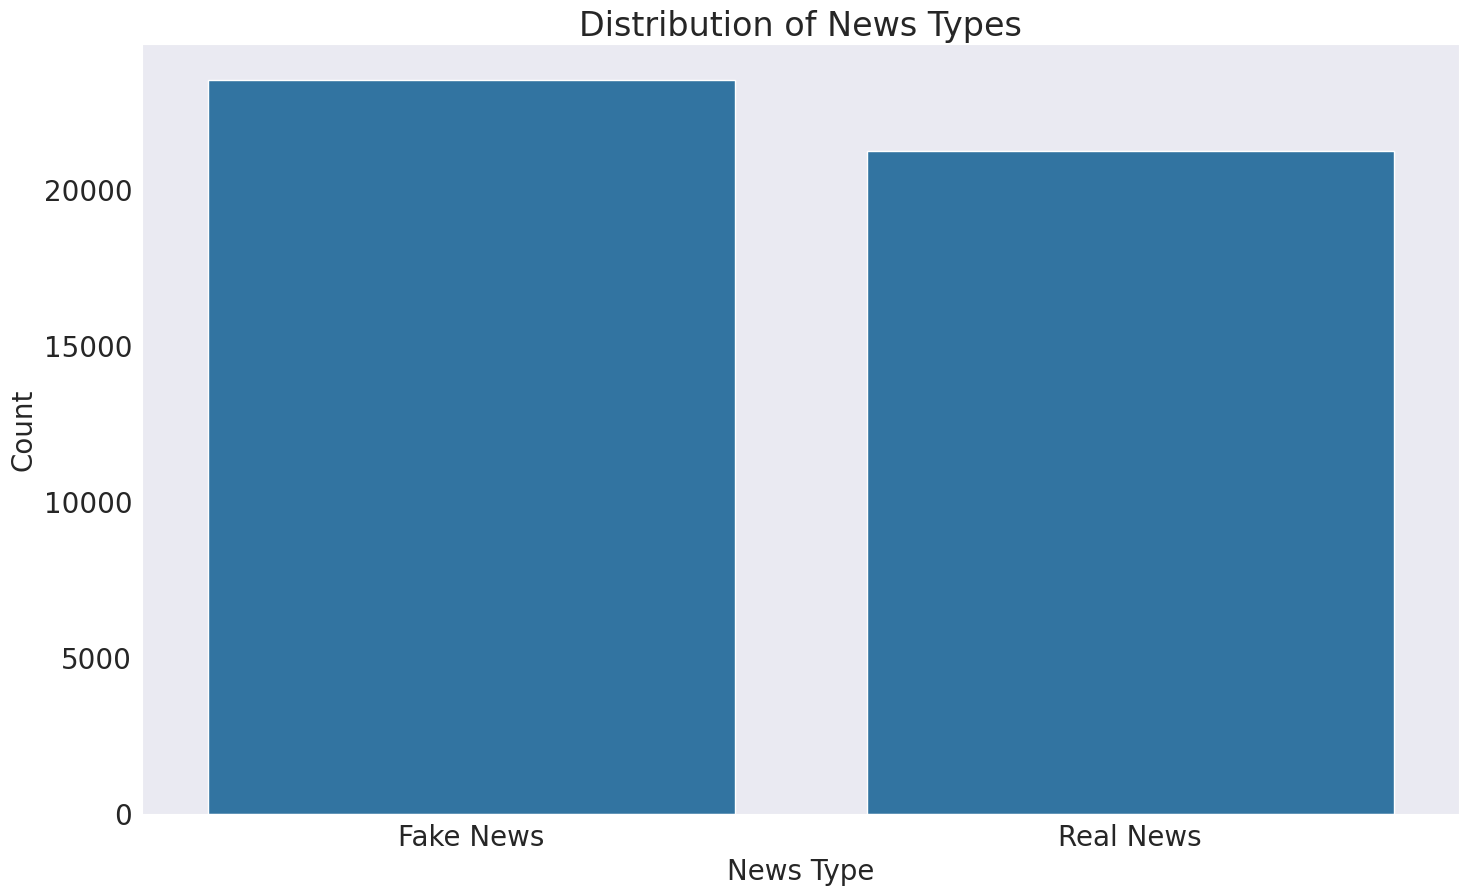

In [39]:
labels = {0: 'Fake News', 1: 'Real News'}

# Plot the count of each category with labels
sns.countplot(x='label', data=df)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Distribution of News Types')
plt.xticks(ticks=[0, 1], labels=[labels[0], labels[1]])  # Set custom labels for x-axis ticks
plt.show()

In [40]:
unique_subjects_real = df1['subject'].unique()
print("subjects in real news dataset",unique_subjects_real)

unique_subjects_fake = df2['subject'].unique()
print("subjects in fake news dataset",unique_subjects_fake)


subjects in real news dataset ['politicsNews' 'worldnews']
subjects in fake news dataset ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


<Axes: xlabel='count', ylabel='subject'>

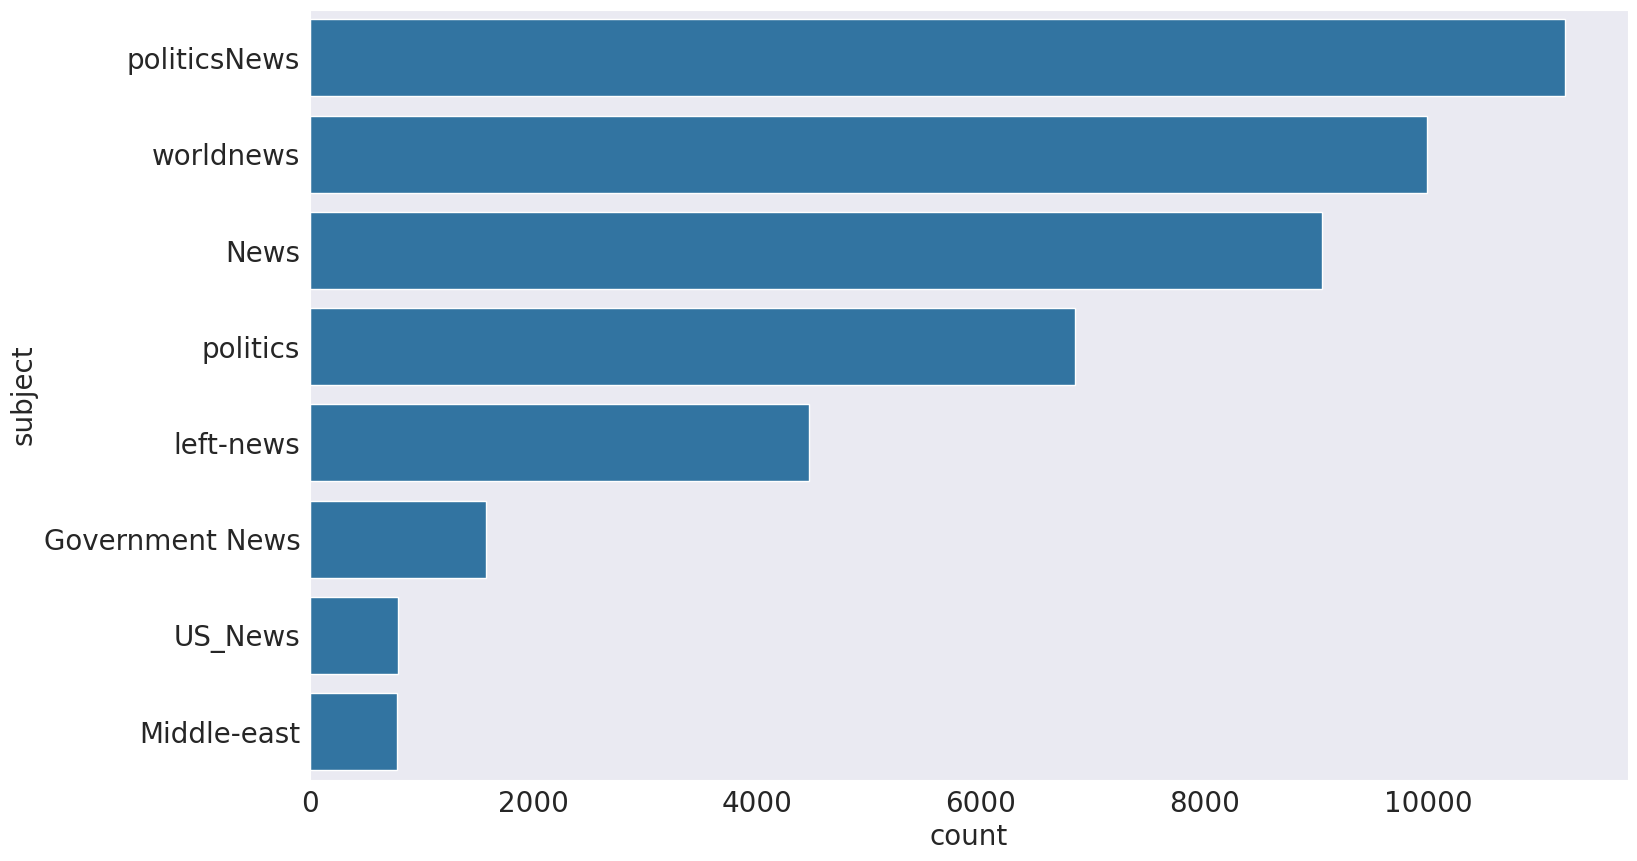

In [41]:
sns.barplot(y=df['subject'].value_counts().index,x=df['subject'].value_counts(),
            orient='h')

In [42]:
df.drop(columns=["date","subject"],inplace=True)

In [43]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [44]:
# Download NLTK resources (word corpus)
nltk.download('words')

# Get English word set from NLTK
english_words = set(nltk.corpus.words.words())

# Function to filter out non-English words
def filter_non_english(text):
    return ' '.join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in english_words or not w.isalpha())

# Apply the function to the column
df['text'] = df['text'].apply(filter_non_english)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [45]:
#removing header tags from columns
df['text'] = df['text'].str.replace(r'\b\w+\s+\(Reuters\) -', '', regex=True)
#removing source links from columns
df['text'] = df['text'].str.replace(r'\(bit\.ly/\w+\)', '', regex=True)
# Remove text enclosed in both round and square brackets, including the brackets
df['text'] = df['text'].str.replace(r'\[[^\]]*\]|\([^)]*\)', '', regex=True)
# Remove usernames starting with '@'
df['text'] = df['text'].str.replace(r'@\w+\b', '', regex=True)

In [46]:
#def cleaning_function(text):
    #removing special characters
 #   clean_1 = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #This line removes newline characters (\n)
  #  clean_2 = re.sub('\n', '', clean_1)
    #remove words containing digits
  #  clean_3= re.sub('\w*\d\w*', '', clean_2)
    #removing all single characters
  #  clean_4=re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_3)
    #removing all non-alphabetical characters
   # clean_5=re.sub(r'[^a-zA-Z\s]', '', clean_4)
    #remove all white spaces from the text
   # clean_6 = re.sub(r'\s+', ' ', clean_5, flags=re.I)
    #removing contractions
   # clean_7= contractions.fix(clean_6)
    #converting text to lower case
   # clean_8=clean_7.lower()

   # return clean_8
def cleaning_function(text):
    # Remove special characters except punctuation marks
    clean_text = re.sub(r'[^a-zA-Z0-9\s' + re.escape(string.punctuation) + ']', '', text)

    # Remove newline characters
    #clean_text = re.sub('\n', ' ', clean_text)

    # Remove words containing digits
    #clean_text = re.sub(r'\w*\d\w*', '', clean_text)

    # Remove all single characters except punctuation marks
    #clean_text = re.sub(r'\s+[^\w\s' + re.escape(string.punctuation) + ']\s+', ' ', clean_text)

    # Remove all non-alphabetical characters except punctuation marks
    #clean_text = re.sub(r'[^a-zA-Z\s' + re.escape(string.punctuation) + ']', '', clean_text)

    #remove hyperlinks, urls
    clean_text = re.sub('https?://\S+|www\.\S+', '', clean_text)

    # Fix contractions
    clean_text = contractions.fix(clean_text)

    # Remove newline characters
    clean_text = re.sub('\n', ' ', clean_text)

    # Remove words containing digits
    clean_text = re.sub(r'\w*\d\w*', '', clean_text)

    # Remove all single characters except punctuation marks
    clean_text = re.sub(r'\s+[^\w\s' + re.escape(string.punctuation) + ']\s+', ' ', clean_text)
    #removing all punctuation marks except full stop
    clean_text = re.sub(r'[^\w\s.]', '', text)

     # Remove extra whitespaces
    clean_text = re.sub(r'\s+', ' ', clean_text)

    # Convert text to lowercase
    clean_text = clean_text.lower()
    return clean_text

df['title'] = df['title'].apply(cleaning_function)
df['text'] = df['text'].apply(cleaning_function)

In [47]:
df.head()

,title,text,label
0,as u.s. budget fight looms republicans flip th...,the head of a conservative republican faction...,1
1,u.s. military to accept transgender recruits o...,people will be for the first time to enlist i...,1
2,senior u.s. republican senator let mr. mueller...,the special counsel investigation of links be...,1
3,fbi russia probe helped by australian diplomat...,trump campaign adviser told an diplomat in ma...,1
4,trump wants postal service to charge much more...,president trump on the u . s . postal service...,1


In [48]:
df['text'][28000]

'just made an amazing stand against bigotry on the by firing one of it s top name for being anti . curt schilling just got handed his pink slip . schilling worked for the network since 2010 and is one of baseball s best known and . but recently schilling decided to share a post in support of an bill in north . the post of an image a man in a wig his t shirt cut to expose and a bizarre black outfit of s clothing . the image was by text which read let him in to the with your daughter or else you re a narrow minded unloving racist bigot who needs to die . former player schilling then added a man is a man no matter what they call themselves . i don t care what they are who they sleep with men s room was designed for the penis s not so much . now you need telling us differently pathetic . later a statement schilling s unacceptable conduct their policy of inclusiveness is an inclusive company . curt schilling been advised that his conduct was unacceptable and his employment with been . of co

In [49]:
df['title'][28000]

' espn just fired curt schilling for this despicable facebook post image'

In [50]:
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]

    return len(stopwords_x)

count_title_sw = (df['title'].apply(count_stopwords))
count_text_sw = (df['text'].apply(count_stopwords))

total_sw_title=count_title_sw.sum()
total_sw_text=count_text_sw.sum()

In [51]:
print("the number of stopwords in title columns are: ",total_sw_title)
print("the number of stopwords in text columns are: ",total_sw_title)

the number of stopwords in title columns are:  134214
the number of stopwords in text columns are:  134214


In [52]:
#count number of sentences
def count_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

In [53]:
dataset=df[['title','text','label']].copy()
dataset.columns=['title','text','label']

In [54]:
dataset['count_title_sentences'] = (df['title'].apply(count_sentences))
dataset['count_text_sentences'] = (df['text'].apply(count_sentences))

In [55]:
dataset['title_word_count'] = dataset['title'].apply(lambda x : len(x.split()))
dataset['text_word_count'] = dataset['text'].apply(lambda x : len(x.split()))

In [56]:
dataset['title_char_count'] = dataset['title'].apply(lambda x : len(x.replace(" ","")))
dataset['text_char_count'] = dataset['text'].apply(lambda x : len(x.replace(" ","")))


In [57]:
dataset['title_word_density'] = dataset['title_word_count'] / (dataset['title_char_count'] + 1)
dataset['text_word_density'] = dataset['text_word_count'] / (dataset['text_char_count'] + 1)

In [58]:
dataset['title_sent_density'] = dataset['count_title_sentences'] / (dataset['title_word_count'] + 1)
dataset['text_sent_density'] = dataset['count_text_sentences'] / (dataset['text_word_count'] + 1)

In [59]:
dataset['title_stopw_count'] =  dataset['title'].apply(lambda x : count_stopwords(x))
dataset['text_stopw_count'] =  dataset['text'].apply(lambda x : count_stopwords(x))
dataset['title_stopw_density'] = dataset['title_stopw_count'] / (dataset['title_word_count'] + 1)
dataset['text_stopw_density'] = dataset['text_stopw_count'] / (dataset['text_word_count'] + 1)

In [60]:
print(dataset[['title_word_count', 'title_char_count', 'title_word_density']].head(5))
print(dataset[['text_word_count', 'text_char_count', 'text_word_density']].head(5))
print(dataset[['count_title_sentences', 'count_text_sentences','text_sent_density','title_sent_density']].head(5))
print(dataset[['title_stopw_count', 'text_stopw_count', 'title_stopw_density', 'text_stopw_density']].head(5))

   title_word_count  title_char_count  title_word_density
0                10                54            0.181818
1                 9                55            0.160714
2                10                48            0.204082
3                 9                49            0.180000
4                11                57            0.189655
   text_word_count  text_char_count  text_word_density
0              678             2896           0.234035
1              543             2371           0.228921
2              423             1810           0.233573
3              327             1442           0.226611
4              775             3222           0.240459
   count_title_sentences  count_text_sentences  text_sent_density  \
0                      1                    40           0.058910   
1                      1                    37           0.068015   
2                      1                    22           0.051887   
3                      1                    21

In [61]:
dataset[['count_text_sentences', 'text_word_count', 'text_char_count', 'text_stopw_count']].describe()

,count_text_sentences,text_word_count,text_char_count,text_stopw_count
count,44689.000000,44689.000000,44689.000000,44689.000000
mean,20.895948,359.009689,1489.281859,172.358567
std,17.721471,311.267923,1318.670268,151.501382
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,176.000000,732.000000,82.000000
50%,18.000000,322.000000,1328.000000,154.000000
75%,27.000000,457.000000,1879.000000,222.000000
max,375.000000,6858.000000,30284.000000,3170.000000


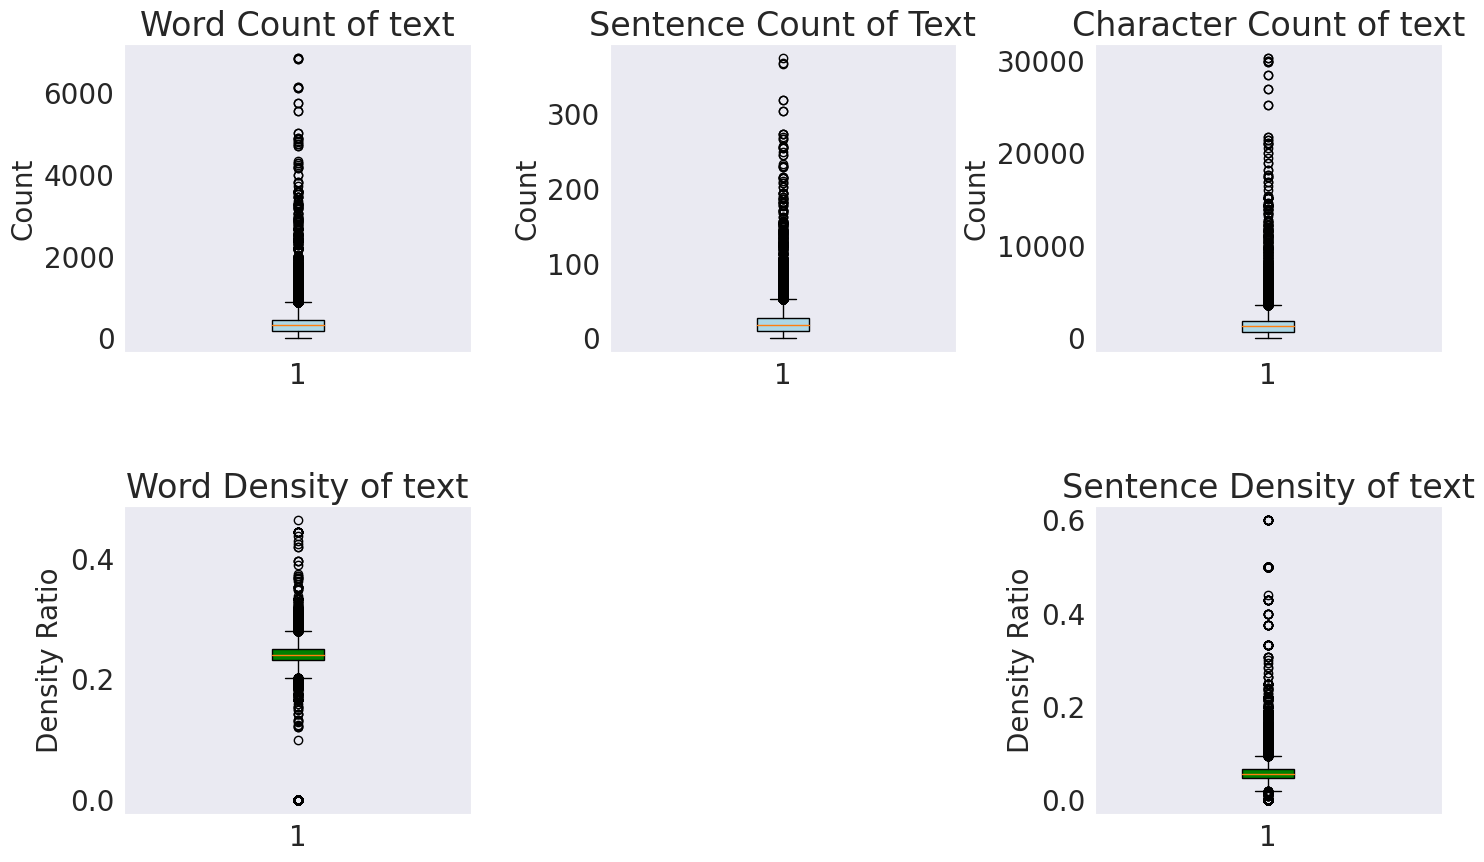

In [62]:
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.4)

boxprops1 = dict(facecolor='lightblue')
boxprops2 = dict(facecolor='green')

plt.subplot(2,3,1)
plt.boxplot(dataset['text_word_count'],patch_artist=True, boxprops=boxprops1 )
plt.ylabel("Count")
plt.title("Word Count of text")

plt.subplot(2,3,2)
plt.boxplot(dataset['count_text_sentences'],patch_artist=True, boxprops=boxprops1)
plt.ylabel("Count")
plt.title("Sentence Count of Text")

plt.subplot(2,3,3)
plt.boxplot(dataset['text_char_count'],patch_artist=True, boxprops=boxprops1)
plt.ylabel("Count")
plt.title("Character Count of text")

plt.subplot(2,3,4)
plt.boxplot(dataset['text_word_density'],patch_artist=True, boxprops=boxprops2)
plt.ylabel("Density Ratio")
plt.title("Word Density of text")

plt.subplot(2,3,6)
plt.boxplot(dataset['text_sent_density'],patch_artist=True, boxprops=boxprops2)
plt.ylabel("Density Ratio")
plt.title("Sentence Density of text")



plt.show()

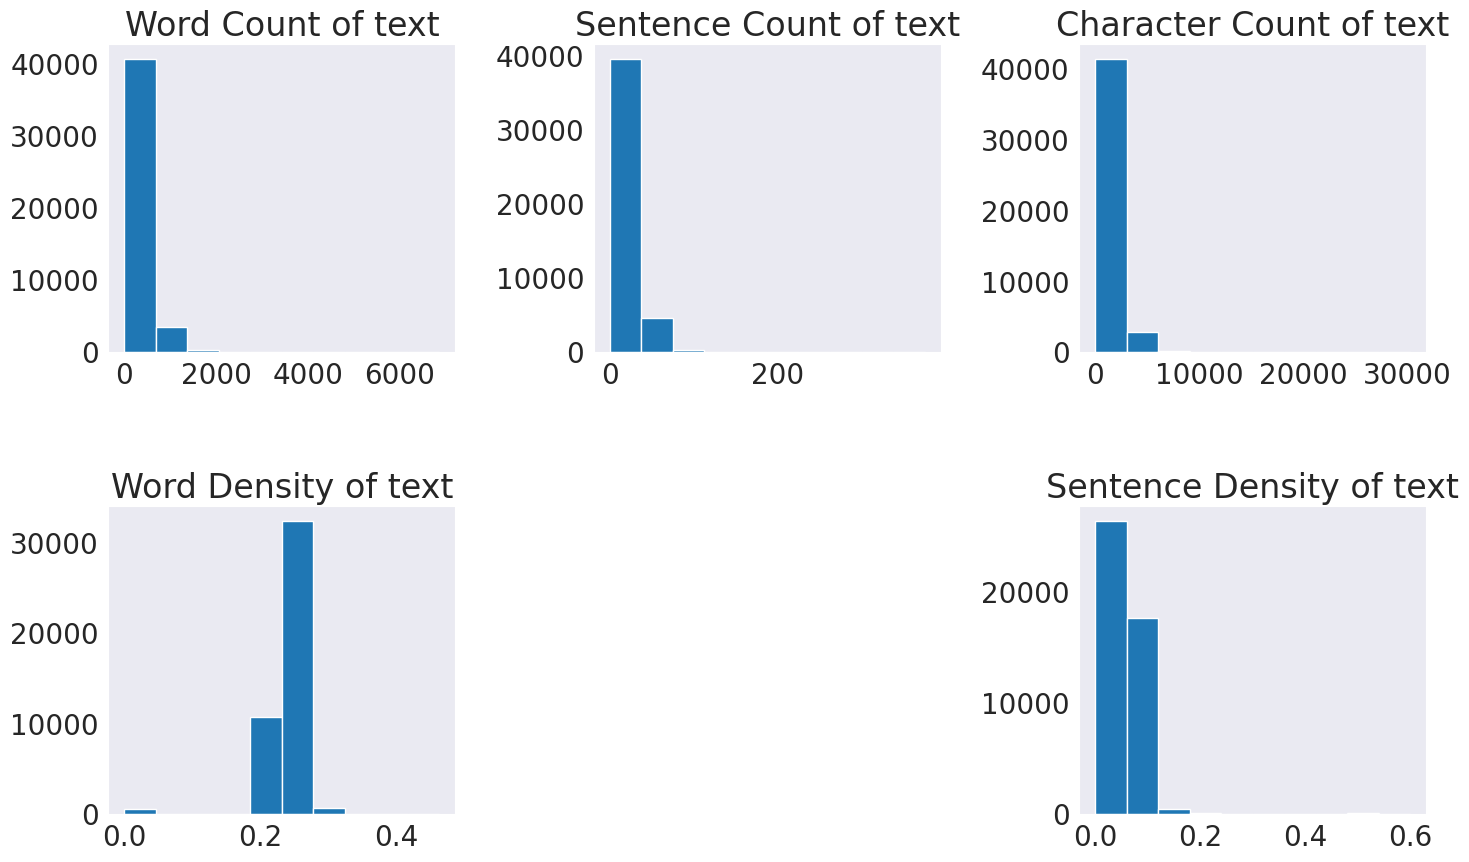

In [63]:
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,1)
plt.hist(dataset['text_word_count'])
plt.title("Word Count of text")

plt.subplot(2,3,2)
plt.hist(dataset['count_text_sentences'])
plt.title("Sentence Count of text")

plt.subplot(2,3,3)
plt.hist(dataset['text_char_count'])
plt.title("Character Count of text")

plt.subplot(2,3,4)
plt.hist(dataset['text_word_density'])
plt.title("Word Density of text")

plt.subplot(2,3,6)
plt.hist(dataset['text_sent_density'])
plt.title("Sentence Density of text")



plt.show()


<Axes: title={'center': 'Bar Chart of the Frequency of the Parts of Speech in Note'}, xlabel='Part Of Speech', ylabel='Frequency'>

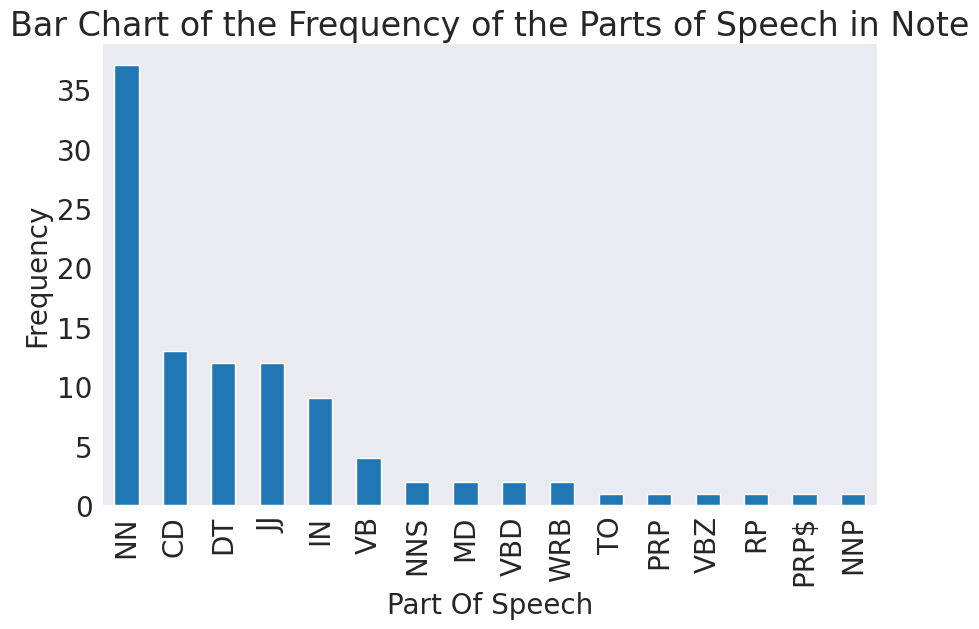

In [64]:
blob = TextBlob(str(dataset['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech in Note",
           figsize=(10, 6))

In [65]:
# Removing extra spaces
df['text']=df['text'].apply(lambda x: re.sub(' +',' ',x))

In [66]:
df['title']=df['title'].apply(lambda x: re.sub(' +',' ',x))

In [67]:
# Convert lists to strings in the 'title' column
df['title'] = df['title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Tokenize the 'title' column
df['title'] = df['title'].apply(word_tokenize)

# Remove stop words from the 'title' column
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [68]:
# Convert lists to strings in the 'title' column
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Tokenize the 'title' column
df['text'] = df['text'].apply(word_tokenize)

# Remove stop words from the 'title' column
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [69]:
def remove_punctuations(tokens):
    punctuation_set = set(string.punctuation)

    cleaned_tokens = [token for token in tokens if token not in punctuation_set]

    return cleaned_tokens

df['title'] = df['title'].apply(remove_punctuations)
df['text'] = df['text'].apply(remove_punctuations)

In [70]:
#lemmatizer = WordNetLemmatizer()
#df['title'] = df['title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [71]:
df['text'][0]

['head',
 'conservative',
 'republican',
 'faction',
 'u',
 'congress',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'fiscal',
 'conservative',
 'budget',
 'restraint',
 '2018',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'u',
 'representative',
 'mark',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'bracing',
 'battle',
 'return',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'immigration',
 'policy',
 'even',
 'congressional',
 'election',
 'approach',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'trump',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'also',
 'want',
 'proportional',
 'non',
 'defense',
 'discretionary',
 'spending',
 'support',
 'education',
 'scientific',
 'research',
 'infrastructure',
 'public',
 'health',
 'environmental',
 'protection',
 'administration',
 'already',
 'willing',
 'say',
 'going',
 'increase',
 'non

In [72]:
all_tokens = [token for tokens in df['text'] for token in tokens]

freq_dist = FreqDist(all_tokens)

most_common_words = freq_dist.most_common()

for word, frequency in most_common_words:
    print(f"Word: {word}, Frequency: {frequency}")

Streaming output truncated to the last 5000 lines.
Word: fearlessness, Frequency: 1
Word: burse, Frequency: 1
Word: g2x2oyte8p, Frequency: 1
Word: ym, Frequency: 1
Word: evrbvigdv9, Frequency: 1
Word: soapbox, Frequency: 1
Word: bfl30oct2h, Frequency: 1
Word: n3lykbkln7, Frequency: 1
Word: f2ad7fs141, Frequency: 1
Word: tscwqe62a4, Frequency: 1
Word: agzdpqpew7, Frequency: 1
Word: vi4g2tkang, Frequency: 1
Word: 2016doubtful, Frequency: 1
Word: 2016nugent, Frequency: 1
Word: ltrl9wiv26, Frequency: 1
Word: idkt1gwemf, Frequency: 1
Word: 2016nonetheless, Frequency: 1
Word: bmqqx9erzw, Frequency: 1
Word: catchword, Frequency: 1
Word: n8efaqdhnt, Frequency: 1
Word: oom3hsdws1, Frequency: 1
Word: 6qxxcticbr, Frequency: 1
Word: parker9_, Frequency: 1
Word: unhuman, Frequency: 1
Word: z6kkgt5hk6, Frequency: 1
Word: babyish, Frequency: 1
Word: puerile, Frequency: 1
Word: exrjn04qij, Frequency: 1
Word: mmdkdqqdh5, Frequency: 1
Word: hspickering1, Frequency: 1
Word: uj5pr2qocj, Frequency: 1
Word:

In [73]:
def remove_non_word_characters(tokens):
    cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    return cleaned_tokens

In [74]:
df['title'] = df['title'].apply(remove_non_word_characters)
df['text'] = df['text'].apply(remove_non_word_characters)

In [75]:
def remove_hyphenated_words(tokens):
    cleaned_tokens = [token for token in tokens if not token.endswith('-')]
    return cleaned_tokens

In [76]:
df['title'] = df['title'].apply(remove_hyphenated_words)
df['text'] = df['text'].apply(remove_hyphenated_words)

In [77]:
def remove_consecutive_duplicates(tokens):
    cleaned_tokens = [tokens[i] for i in range(len(tokens)) if i == 0 or tokens[i] != tokens[i-1]]
    return cleaned_tokens

In [78]:
df['title'] = df['title'].apply(remove_consecutive_duplicates)
df['text'] = df['text'].apply(remove_consecutive_duplicates)

In [79]:
# Convert tokenized text back to string
df['title'] = df['title'].apply(lambda x: ' '.join(x))
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [80]:
#removing 'u'
df['text'] = df['text'].str.replace(r'\b(u)\b', '', regex=True)

In [81]:
MostFreq = Counter(" ".join(df['text']).split()).most_common(10)
result = pd.DataFrame(MostFreq, columns=['Word', 'Frequency'])
print(result)


         Word  Frequency
0       trump     131489
1        said     130291
2   president      55030
3       would      54510
4      people      41237
5         one      37208
6       state      33715
7        also      30992
8         new      30830
9  government      27484


In [82]:
words=[]
freq=[]

for word, count in MostFreq:
    words.append(word)
    freq.append(count)

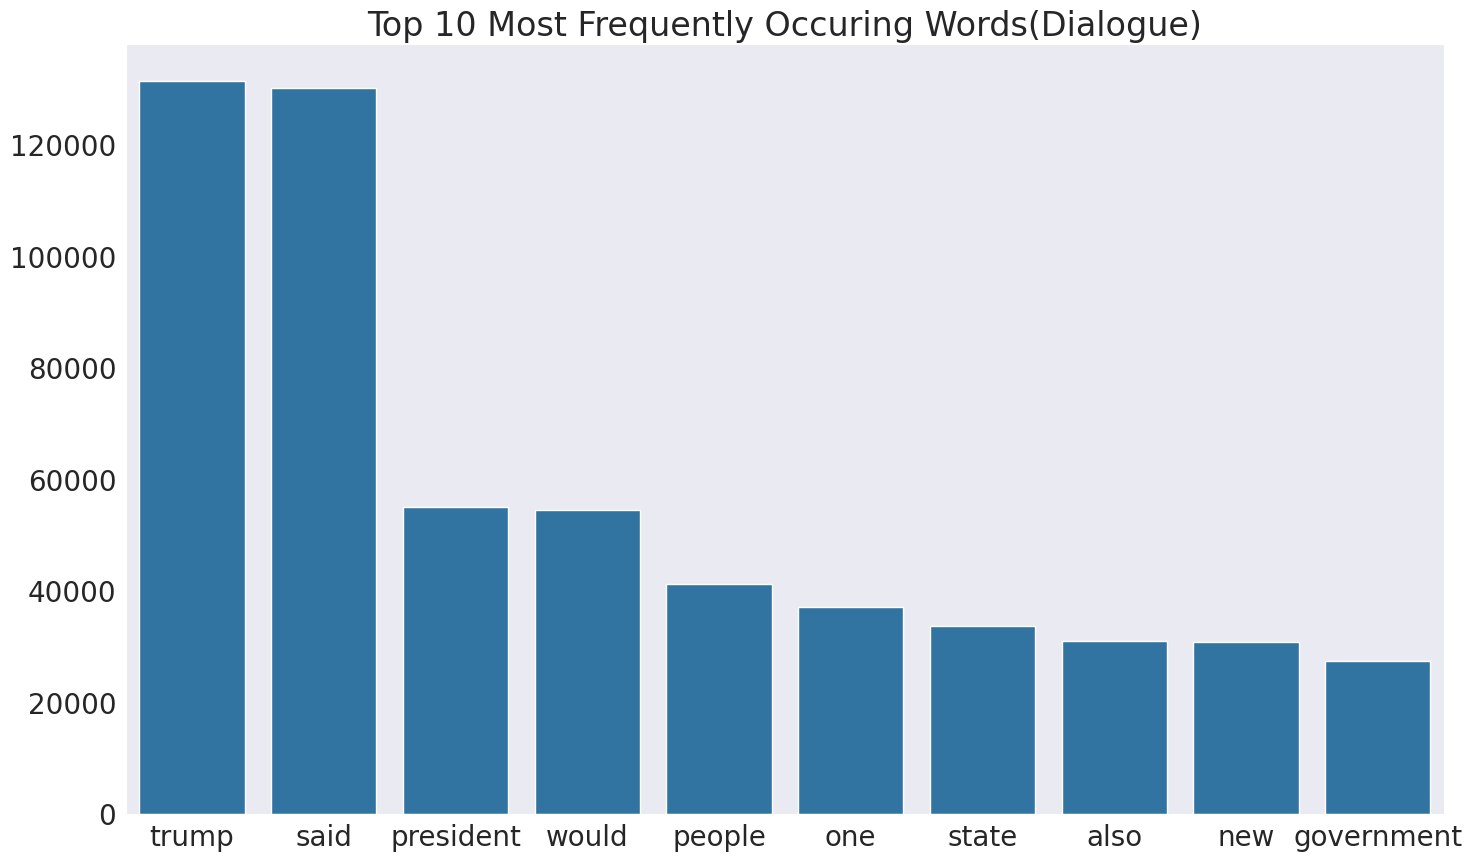

In [83]:
sns.barplot(x=words, y=freq)
plt.title('Top 10 Most Frequently Occuring Words(Dialogue)')
plt.show()

In [84]:

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['text'] )

In [85]:
from scipy.sparse import csr_matrix

# Convert bigrams to CSR format if it's not already in CSR format
if not isinstance(bigrams, csr_matrix):
    bigrams = bigrams.tocsr()

# Calculate the sum of each column (word frequency)
count_values = bigrams.sum(axis=0)

# Convert count_values to a dense numpy array
count_values = count_values.A.ravel()

# Create a DataFrame with frequency and word columns
ngram_freq = pd.DataFrame({"frequency": count_values, "words": cv.get_feature_names_out()})
ngram_freq = ngram_freq.sort_values(by="frequency", ascending=False)


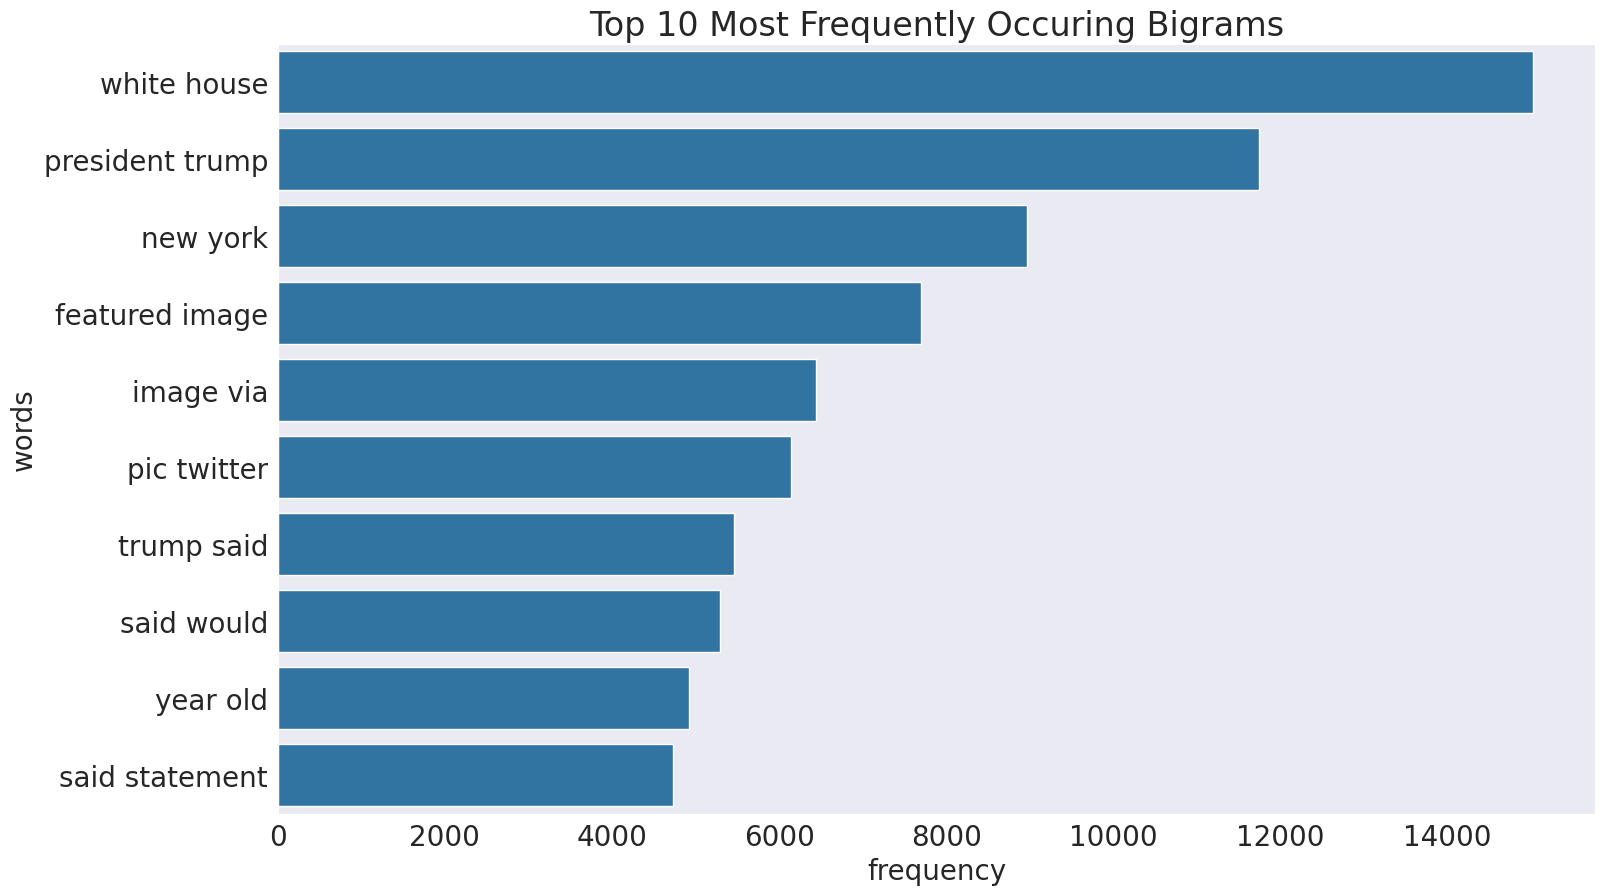

In [86]:
sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['words'][:10] )
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()


In [87]:
from sklearn.feature_extraction.text import CountVectorizer

# Define CountVectorizer with limited max_features
cv1 = CountVectorizer(ngram_range=(3,3), max_features=1000)  # Adjust max_features as needed

# Fit and transform the text column
trigrams = cv1.fit_transform(df['text'])

# Sum the counts of each n-gram
count_values = trigrams.toarray().sum(axis=0)

# Create DataFrame to store n-gram frequencies
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "words"]


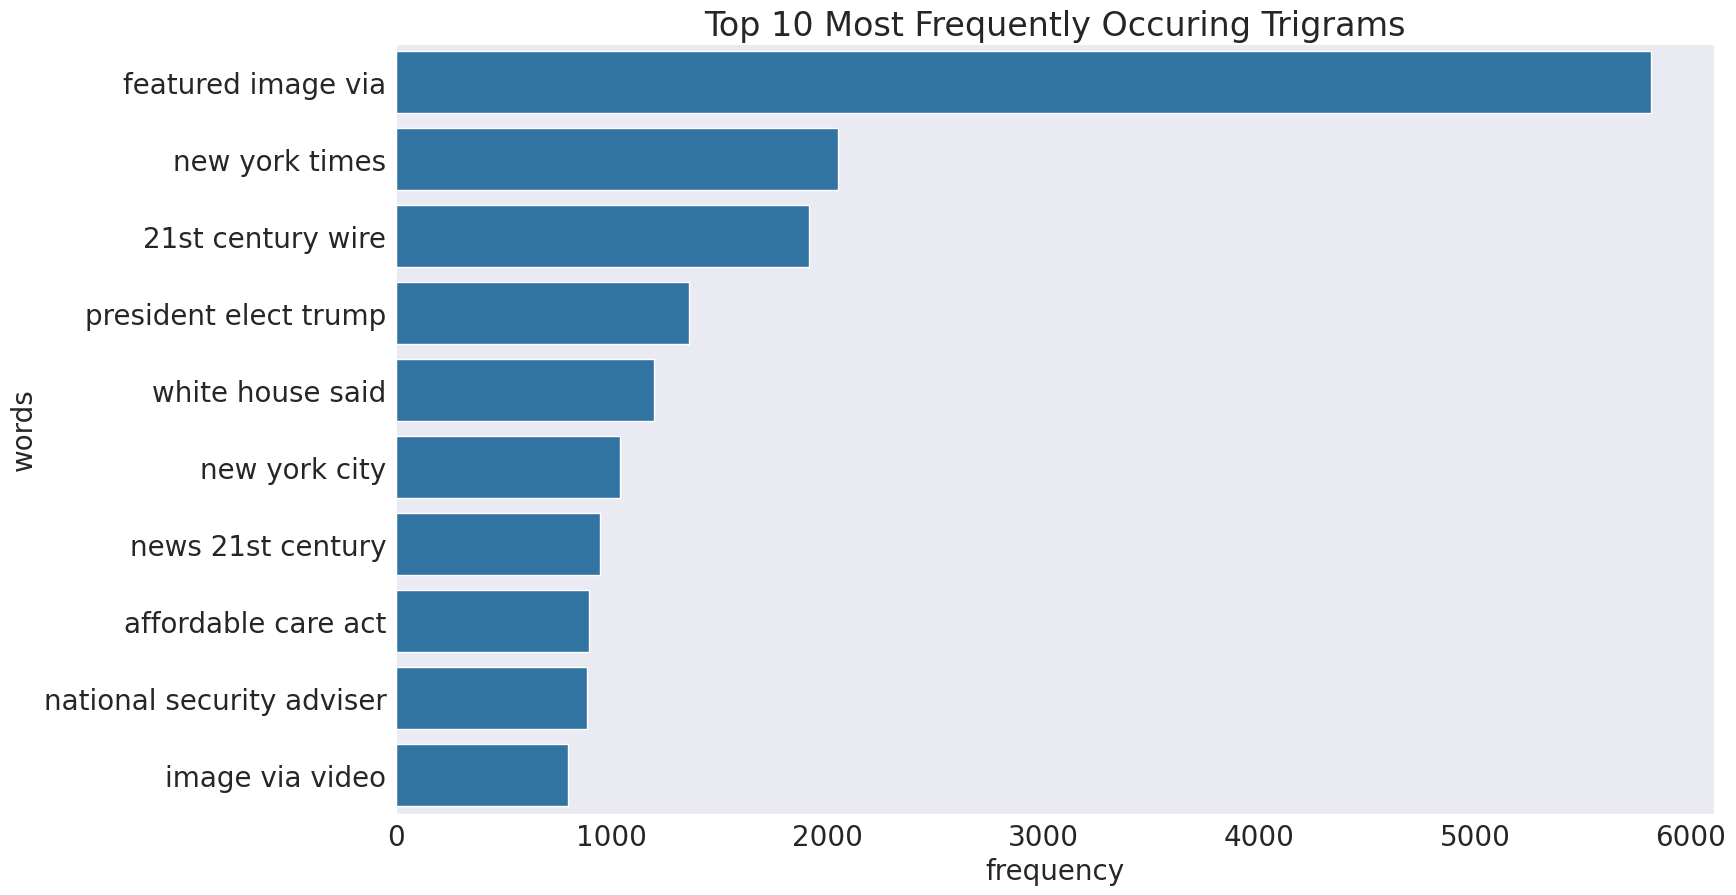

In [88]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['words'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [89]:
text=" ".join(word for word in df['text'])
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="grey",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

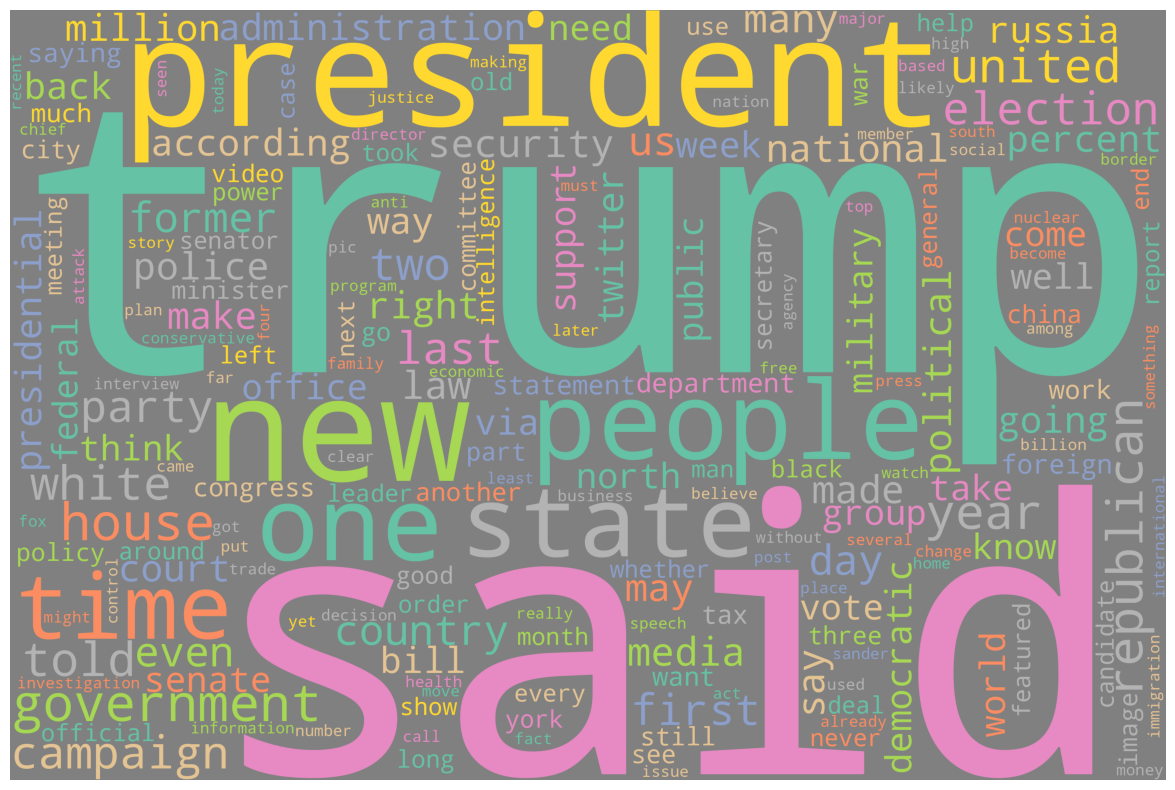

In [90]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

using logistic regression for binary classification

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [92]:
x_features=df.text.values
y_features=df.label.values

In [93]:
x_features = TfidfVectorizer().fit_transform(x_features)
print(x_features)

  (0, 39754)	0.032047330341778875
  (0, 4904)	0.05553352976758812
  (0, 16863)	0.030240016453120303
  (0, 9758)	0.073733564525967
  (0, 6397)	0.06549015944146562
  (0, 7775)	0.13346982692304019
  (0, 15809)	0.04733101431131955
  (0, 31025)	0.054132017624482255
  (0, 18803)	0.03759756857070078
  (0, 38945)	0.024294516712926373
  (0, 32330)	0.04919499914898885
  (0, 34234)	0.045022521682148285
  (0, 38800)	0.0439439275374246
  (0, 14580)	0.041126740609627205
  (0, 24406)	0.07682632943940187
  (0, 11807)	0.049878281223892464
  (0, 23376)	0.06531668769291768
  (0, 16922)	0.04254082853201351
  (0, 35821)	0.02087137668622419
  (0, 19665)	0.029362206686793128
  (0, 7748)	0.06108315426818377
  (0, 16428)	0.04379704654933655
  (0, 22971)	0.027108467125410735
  (0, 38580)	0.07645129876462921
  (0, 10198)	0.03757268150774614
  :	:
  (44688, 35872)	0.04898969099642056
  (44688, 38836)	0.02620975097821112
  (44688, 12151)	0.02375621998385283
  (44688, 30800)	0.03409662811004023
  (44688, 26611)	0.0

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size = 0.2, stratify = y_features, random_state = 2)

In [95]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, y_train)
print(training_accuracy)

0.9801124444071494


In [97]:
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, y_test)
print(testing_accuracy)

0.9674423808458268


using RNN for prediction

In [98]:
df['text'][0]

'head conservative republican faction  congress month huge expansion national debt pay tax fiscal conservative budget restraint 2018 keeping sharp pivot way among  representative mark speaking face nation drew hard line federal spending bracing battle return begin trying pass federal budget fight likely linked immigration policy even congressional election approach seek keep control congress president trump want big budget increase military spending also want proportional non defense discretionary spending support education scientific research infrastructure public health environmental protection administration already willing say going increase non defense discretionary spending  7 percent chairman small influential house freedom caucus said program saying enough need give government pay raise 10 11 percent fiscal conservative see rationale  eventually run people money said among late party debt tax overhaul balloon federal budget deficit add 1 5 trillion 10 20 trillion national debt 

In [99]:
features = df['text']
targets = df['label']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [100]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [101]:
# tokenize the text into vectors
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [102]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [104]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1073/1073 [==============================] - 715s 658ms/step - loss: 0.2429 - accuracy: 0.8784 - val_loss: 0.0780 - val_accuracy: 0.9785
Epoch 2/10
1073/1073 [==============================] - 622s 580ms/step - loss: 0.0695 - accuracy: 0.9806 - val_loss: 0.0726 - val_accuracy: 0.9765
Epoch 3/10
1073/1073 [==============================] - 621s 579ms/step - loss: 0.0421 - accuracy: 0.9901 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 4/10
1073/1073 [==============================] - 620s 577ms/step - loss: 0.0289 - accuracy: 0.9940 - val_loss: 0.0624 - val_accuracy: 0.9832
Epoch 5/10
1073/1073 [==============================] - 623s 580ms/step - loss: 0.0192 - accuracy: 0.9968 - val_loss: 0.0639 - val_accuracy: 0.9843


In [105]:
loss,accuracy=model.evaluate(X_test, y_test)
print("Loss of the Model: ",loss)
print("Accuracy of the Model: ", accuracy)

280/280 [==============================] - 40s 141ms/step - loss: 0.0654 - accuracy: 0.9808
Loss of the Model:  0.06538015604019165
Accuracy of the Model:  0.9807563424110413


In [106]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

280/280 [==============================] - 44s 144ms/step


In [107]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9807563213246812
Precision on testing set: 0.9764650506001412
Recall on testing set: 0.9829424307036247


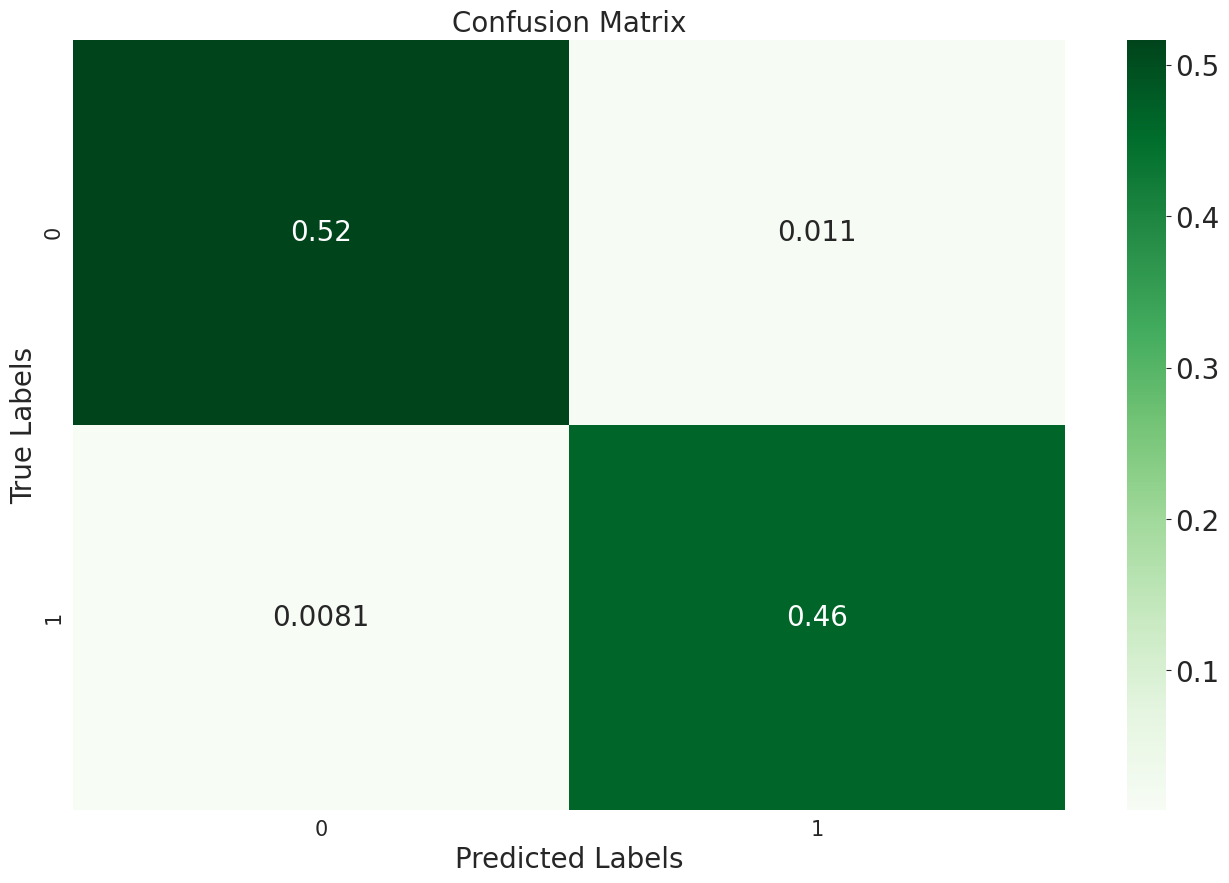

In [108]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax, cmap='Greens')

# Labels, title, and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0, 1], size=15)
ax.yaxis.set_ticklabels([0, 1], size=15)

plt.show()